# Programa Bienestar - Fertilizantes

En esta parte del proyecto vamos a realizar un análisis exploratorio de los datos obtenidos en los últimos 4 años del programa bienestar del gobierno de México para el apoyo de a productores y productoras de pequeña escala para contribuir en la producción de alimentos. Mas información en: https://programasparaelbienestar.gob.mx/fertilizantes-para-el-bienestar/.<br>

El conjunto de datos se obtuvo del sitio web https://datos.gob.mx/busca/dataset, donde es posible descargar archivos en diversos formatos para el análisis y uso de la información pública. Este portal de datos abiertos ofrece una amplia gama de conjuntos de datos relacionados con diferentes sectores y programas gubernamentales, incluido el Programa Bienestar - Fertilizantes.<br>

Los datos disponibles en este sitio permiten a los investigadores, analistas y público en general acceder a información detallada sobre la implementación y resultados del programa de fertilizantes. Esto facilita el estudio de su impacto en la producción agrícola de pequeña escala y en el bienestar de las comunidades rurales en México.


### Análisis Exploratorio de los datos (EDA)

#### Objetivo de analisis

El presente proyecto tiene como objetivo, en función de los datos proporcionados, identificar los patrones que nos permitan determinar qué variables o situaciones de las personas solicitantes tienen un mayor impacto en su ingreso al programa Bienestar - Fertilizantes.<br>

Para lograr este objetivo, se llevará a cabo un análisis exhaustivo de las variables socioeconómicas, demográficas y agrícolas de los solicitantes, utilizando técnicas estadísticas y de aprendizaje automático. Este enfoque nos permitirá identificar los factores más influyentes en la selección de beneficiarios y evaluar la eficacia del programa en alcanzar a la población objetivo.


#### Cargar datos

In [1]:
# Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
from scipy import stats
from tabulate import tabulate
import warnings

#ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# local modules
from project import Beneficiarios
from project import print_dataframe_info
from project import print_summary
from project import print_describe
from project import distribucion_plot
from project import label_encode
from project import correlacion
from project import bivariado

warnings.filterwarnings('ignore')

In [2]:
Beneficiarios_2020 = Beneficiarios(2020)
Beneficiarios_2021 = Beneficiarios(2021)
Beneficiarios_2022 = Beneficiarios(2022)
Beneficiarios_2023 = Beneficiarios(2023)

#### Revision inicial de los datos

Cada columna representa un aspecto clave relacionado con los beneficiarios y la distribución de los fertilizantes permitiendo análisis desde múltiples perspectivas: geográfica, temporal, financiera y socioeconómica. Esto es fundamental para evaluar la efectividad del programa y realizar recomendaciones basadas en datos.

**Columnas**

- **BENEFICIARIO:** Nombre del beneficiario.
- **ZONA:** Región o zona del país.
- **ENTIDAD:** Estado o entidad federativa.
- **MUNICIPIO:** Municipio del beneficiario.
- **LOCALIDAD:** Localidad específica dentro del municipio.
- **ESTRATIFICACIÓN:** Nivel socioeconómico o clasificación.
- **PROGRAMA:** Nombre del programa, en este caso "FERTILIZANTES".
- **COMPONENTE:** Componente específico del programa.
- **SUBCOMPONENTE:** Subcomponente asociado.
- **PRODUCTO:** Producto agrícola relacionado (por ejemplo, "Cultivo de maíz grano").
- **FECHA:** Fecha en que se realizó el apoyo.
- **MONTO FEDERAL:** Cantidad de dinero otorgada (en pesos).
- **APOYO:** Tipo de apoyo (ej. "Fertilizantes").
- **ACTIVIDAD:** Tipo de actividad (ej. "AGRARIA").
- **ESLABÓN:** Especifica el eslabón dentro de la cadena productiva.
- **CICLO AGRÍCOLA:** Ciclo agrícola correspondiente (ej. "PV2020").

In [3]:
Beneficiarios_2020.head(5)

,BENEFICIARIO,ZONA,ENTIDAD,MUNICIPIO,LOCALIDAD,ESTRATIFICACIÓN,PROGRAMA,COMPONENTE,SUBCOMPONENTE,PRODUCTO,FECHA,MONTO FEDERAL,APOYO,ACTIVIDAD,ESLABÓN,CICLO AGRÍCOLA
0,ESPINOZA ZAMORA SILVANO,CENTRO PAÍS,GUERRERO,ACATEPEC,ESCALERILLA ZAPATA,Muy alto,FERTILIZANTES,FERTILIZANTES,FERTILIZANTES,Cultivo de maíz grano,2020-06-12,6163.44,Fertilizantes,AGRARIA,AGRARIA,PV2020
1,CASTRO IGNACIO ESTEBAN,CENTRO PAÍS,GUERRERO,ACATEPEC,ESCALERILLA ZAPATA,Muy alto,FERTILIZANTES,FERTILIZANTES,FERTILIZANTES,Cultivo de maíz grano,2020-06-14,6163.44,Fertilizantes,AGRARIA,AGRARIA,PV2020
2,ESPINOZA ESPINOZA AMELIA,CENTRO PAÍS,GUERRERO,ACATEPEC,ESCALERILLA ZAPATA,Muy alto,FERTILIZANTES,FERTILIZANTES,FERTILIZANTES,Cultivo de maíz grano,2020-06-15,3081.72,Fertilizantes,AGRARIA,AGRARIA,PV2020
3,DIRCIO CALIXTO ANUNCIACION,CENTRO PAÍS,GUERRERO,ACATEPEC,ESCALERILLA ZAPATA,Muy alto,FERTILIZANTES,FERTILIZANTES,FERTILIZANTES,Cultivo de maíz grano,2020-06-15,3081.72,Fertilizantes,AGRARIA,AGRARIA,PV2020
4,CALIXTRO LOPEZ LAURA,CENTRO PAÍS,GUERRERO,ACATEPEC,ESCALERILLA ZAPATA,Muy alto,FERTILIZANTES,FERTILIZANTES,FERTILIZANTES,Cultivo de maíz grano,2020-06-15,3081.72,Fertilizantes,AGRARIA,AGRARIA,PV2020


**Tipos de variables**
1. **Variables Categóricas:**
- Son variables que describen atributos o categorías y que no tienen un valor numérico intrínseco. En este conjunto de datos, las variables categóricas son fundamentales para segmentar y clasificar la información.
- Numero de variables categóricas: 14

2. **Variables Numericas:** 
- Son variables que representan cantidades y se pueden medir y ordenar. Las variables numéricas en este dataset permiten realizar análisis estadísticos y financieros.
- Numero de variables categóricas: 2
    - MONTO FEDERAL: Cantidad de dinero otorgada en pesos.
    - FECHA: Fecha en la que se realizó el apoyo, registrada como una variable temporal, pero que puede ser tratada numéricamente para análisis cronológicos.

In [4]:
# Imprimir información de cada DataFrame
print_dataframe_info(Beneficiarios_2020, 2020)
print_dataframe_info(Beneficiarios_2021, 2021)
print_dataframe_info(Beneficiarios_2022, 2022)
print_dataframe_info(Beneficiarios_2023, 2023)


Beneficiarios 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369121 entries, 0 to 369120
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BENEFICIARIO     369121 non-null  object        
 1   ZONA             369121 non-null  object        
 2   ENTIDAD          369121 non-null  object        
 3   MUNICIPIO        369121 non-null  object        
 4   LOCALIDAD        369121 non-null  object        
 5   ESTRATIFICACIÓN  369121 non-null  object        
 6   PROGRAMA         369121 non-null  object        
 7   COMPONENTE       369121 non-null  object        
 8   SUBCOMPONENTE    369121 non-null  object        
 9   PRODUCTO         369121 non-null  object        
 10  FECHA            369121 non-null  datetime64[ns]
 11  MONTO FEDERAL    369121 non-null  float64       
 12  APOYO            369121 non-null  object        
 13  ACTIVIDAD        369121 non-null  object        
 14  

#### Revision de valores faltantes y duplicados

Al realizar una revisión inicial del conjunto de datos del Programa de Fertilizantes, se llevaron a cabo dos análisis importantes:<br>
**Valores Faltantes:**

- Resultados: No se encontraron valores faltantes en ninguna de las columnas del conjunto de datos. Esto indica que la base de datos está completa y no hay necesidad de imputar o manejar datos faltantes.
- Importancia: La ausencia de valores faltantes es crucial, ya que garantiza que el análisis será más robusto y que todas las observaciones están completas, lo que permite un análisis más preciso y confiable.

**Columnas Duplicadas:**
- Resultados: No se encontraron columnas duplicadas en el conjunto de datos.
- Importancia: La inexistencia de columnas duplicadas asegura que no hay redundancia en la información almacenada, lo que podría complicar el análisis o llevar a resultados distorsionados.

In [5]:
print('Faltantes 2020')
print(Beneficiarios_2020.isna().sum())
print('\nFaltantes 2021')
print(Beneficiarios_2021.isna().sum())
print('\nFaltantes 2022')
print(Beneficiarios_2022.isna().sum())
print('\nFaltantes 2023')
print(Beneficiarios_2023.isna().sum())

Faltantes 2020
BENEFICIARIO       0
ZONA               0
ENTIDAD            0
MUNICIPIO          0
LOCALIDAD          0
ESTRATIFICACIÓN    0
PROGRAMA           0
COMPONENTE         0
SUBCOMPONENTE      0
PRODUCTO           0
FECHA              0
MONTO FEDERAL      0
APOYO              0
ACTIVIDAD          0
ESLABÓN            0
CICLO AGRÍCOLA     0
dtype: int64

Faltantes 2021
BENEFICIARIO       0
ZONA               0
ENTIDAD            0
MUNICIPIO          0
LOCALIDAD          0
ESTRATIFICACIÓN    0
PROGRAMA           0
COMPONENTE         0
SUBCOMPONENTE      0
PRODUCTO           0
FECHA              0
MONTO FEDERAL      0
APOYO              0
ACTIVIDAD          0
ESLABÓN            0
CICLO AGRÍCOLA     0
dtype: int64

Faltantes 2022
BENEFICIARIO       0
ZONA               0
ENTIDAD            0
MUNICIPIO          0
LOCALIDAD          0
ESTRATIFICACIÓN    0
PROGRAMA           0
COMPONENTE         0
SUBCOMPONENTE      0
PRODUCTO           0
FECHA              0
MONTO FEDERAL      0
APO

#### Filtrado de columnas
En este paso, se procede a la depuración del conjunto de datos, eliminando aquellas columnas categóricas que no aportan valor significativo al análisis. Estas columnas suelen contener valores únicos o repetidos que no contribuyen a la variabilidad del modelo.

In [6]:
print_describe(Beneficiarios_2020, 2020)
print_describe(Beneficiarios_2021, 2021)
print_describe(Beneficiarios_2022, 2022)
print_describe(Beneficiarios_2023, 2023)


Beneficiarios 2020
+-------------+----------------------------+-------------+-----------+--------------------+-------------+-------------------+---------------+---------------+-----------------+-----------------------+---------------+-------------+-----------+------------------+
| Attribute   | BENEFICIARIO               | ZONA        | ENTIDAD   | MUNICIPIO          | LOCALIDAD   | ESTRATIFICACIÓN   | PROGRAMA      | COMPONENTE    | SUBCOMPONENTE   | PRODUCTO              | APOYO         | ACTIVIDAD   | ESLABÓN   | CICLO AGRÍCOLA   |
+=============+============================+=============+===========+====================+=============+===================+===============+===============+=================+=======================+===============+=============+===========+==================+
| count       | 369121                     | 369121      | 369121    | 369121             | 369121      | 369121            | 369121        | 369121        | 369121          | 369121               

In [7]:
columns_filter = ['BENEFICIARIO','PROGRAMA','COMPONENTE','SUBCOMPONENTE','APOYO','ACTIVIDAD','ESLABÓN','CICLO AGRÍCOLA']

Beneficiarios_2020 = Beneficiarios_2020.drop(columns=columns_filter)
Beneficiarios_2021 = Beneficiarios_2021.drop(columns=columns_filter)
Beneficiarios_2022 = Beneficiarios_2022.drop(columns=columns_filter)
Beneficiarios_2023 = Beneficiarios_2023.drop(columns=columns_filter)

print_describe(Beneficiarios_2020, 2020)
print_describe(Beneficiarios_2021, 2021)
print_describe(Beneficiarios_2022, 2022)
print_describe(Beneficiarios_2023, 2023)



Beneficiarios 2020
+-------------+-------------+-----------+--------------------+-------------+-------------------+-----------------------+
| Attribute   | ZONA        | ENTIDAD   | MUNICIPIO          | LOCALIDAD   | ESTRATIFICACIÓN   | PRODUCTO              |
+=============+=============+===========+====================+=============+===================+=======================+
| count       | 369121      | 369121    | 369121             | 369121      | 369121            | 369121                |
+-------------+-------------+-----------+--------------------+-------------+-------------------+-----------------------+
| unique      | 2           | 5         | 181                | 4270        | 7                 | 1                     |
+-------------+-------------+-----------+--------------------+-------------+-------------------+-----------------------+
| top         | CENTRO PAÍS | GUERRERO  | CHILAPA DE ÁLVAREZ | TECOANAPA   | Alto              | Cultivo de maíz grano |
+-----------

#### Análisis estadistico descriptivo
El análisis estadístico descriptivo proporciona un resumen de las características principales de los datos numéricos en el conjunto de datos del Programa de Fertilizantes. Este resumen incluye información clave como la media y la desviación estándar, que son útiles para comprender la distribución y la variabilidad de los montos federales distribuidos.<br>

Por ejemplo, al analizar la columna "MONTO FEDERAL", podemos identificar el rango de las cantidades otorgadas (desde el mínimo hasta el máximo), así como la tendencia central y la dispersión de los valores. Estos datos son cruciales para evaluar la equidad y eficiencia del programa.


In [8]:
print_summary(Beneficiarios_2020, 2020)
print_summary(Beneficiarios_2021, 2021)
print_summary(Beneficiarios_2022, 2022)
print_summary(Beneficiarios_2023, 2023)



Beneficiarios 2020
+-------------+-------------------------------+-----------------+
| Attribute   | FECHA                         |   MONTO FEDERAL |
+=============+===============================+=================+
| count       | 369121                        |       369121    |
+-------------+-------------------------------+-----------------+
| mean        | 2020-07-06 04:32:40.293779456 |         4677.48 |
+-------------+-------------------------------+-----------------+
| min         | 2020-05-07 00:00:00           |         2701.46 |
+-------------+-------------------------------+-----------------+
| 25%         | 2020-06-04 00:00:00           |         3081.72 |
+-------------+-------------------------------+-----------------+
| 50%         | 2020-06-17 00:00:00           |         5577.06 |
+-------------+-------------------------------+-----------------+
| 75%         | 2020-07-04 00:00:00           |         6163.44 |
+-------------+-------------------------------+---------

#### Visualización de la distribucion de los datos

1. **Distribución del Monto Federal**
- El **histograma** muestra la distribución de los montos federales otorgados a los beneficiarios. La mayoría de los beneficiarios recibieron montos dentro de un rango específico, con una curva que podría estar sesgada hacia la izquierda o derecha dependiendo de la forma observada.


2. **Identificación de Valores Atípicos**
- El **boxplot** revela la presencia de posibles valores atípicos (outliers) en los montos federales. Estos valores atípicos pueden ser casos donde se otorgaron montos significativamente mayores o menores comparados con la mayoría de los beneficiarios.

3. **Distribución de Beneficiarios por Entidad**
- El gráfico de barras muestra cómo se distribuyen los beneficiarios a lo largo de las diferentes entidades federativas. Algunas entidades pueden tener un mayor número de beneficiarios, lo que podría reflejar necesidades más altas en esas áreas o una mayor focalización del programa.



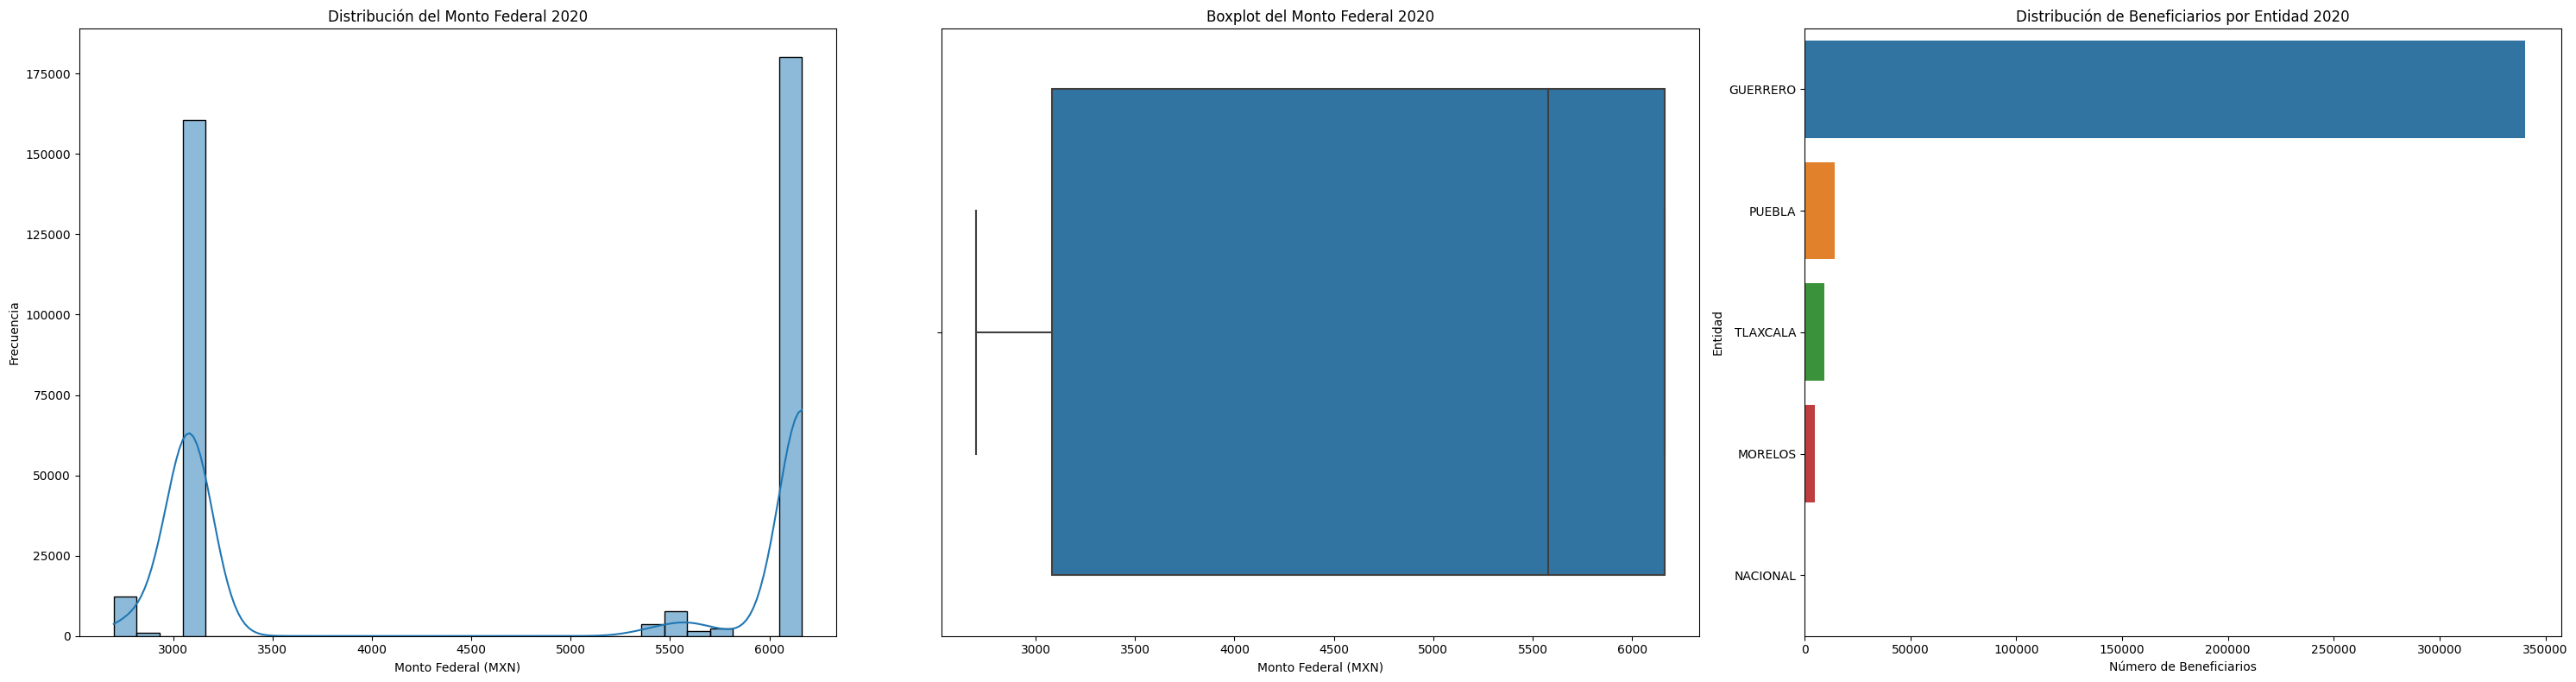

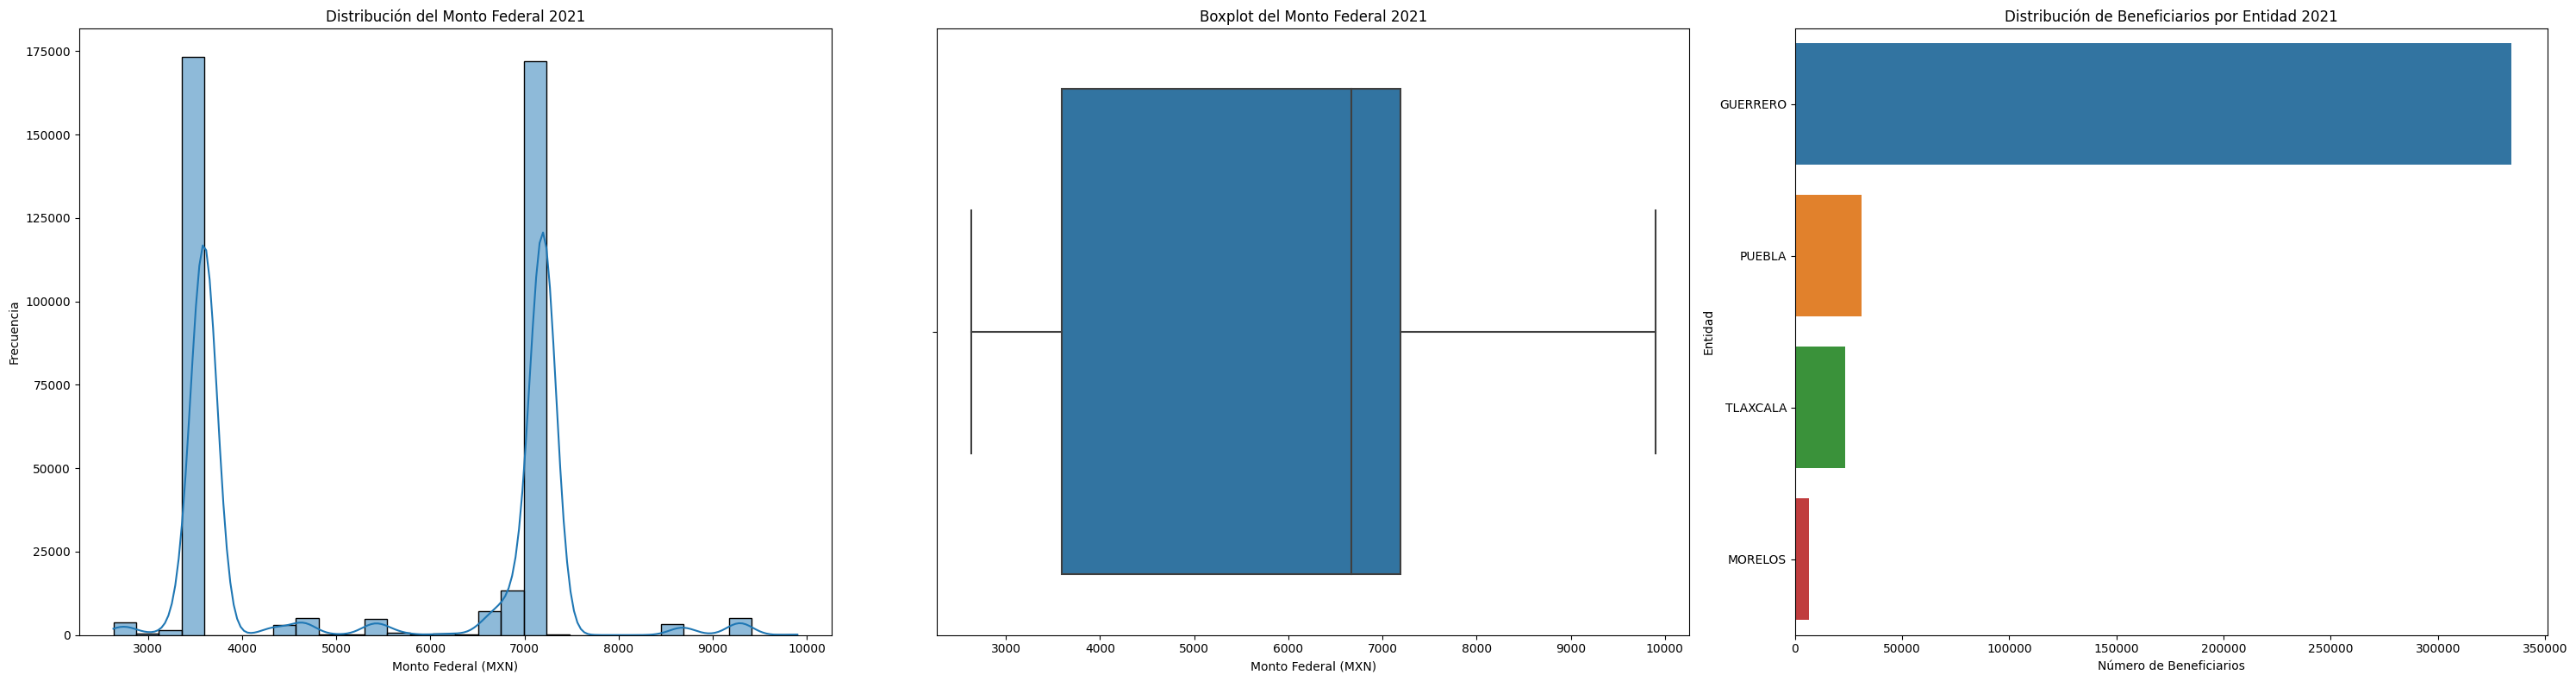

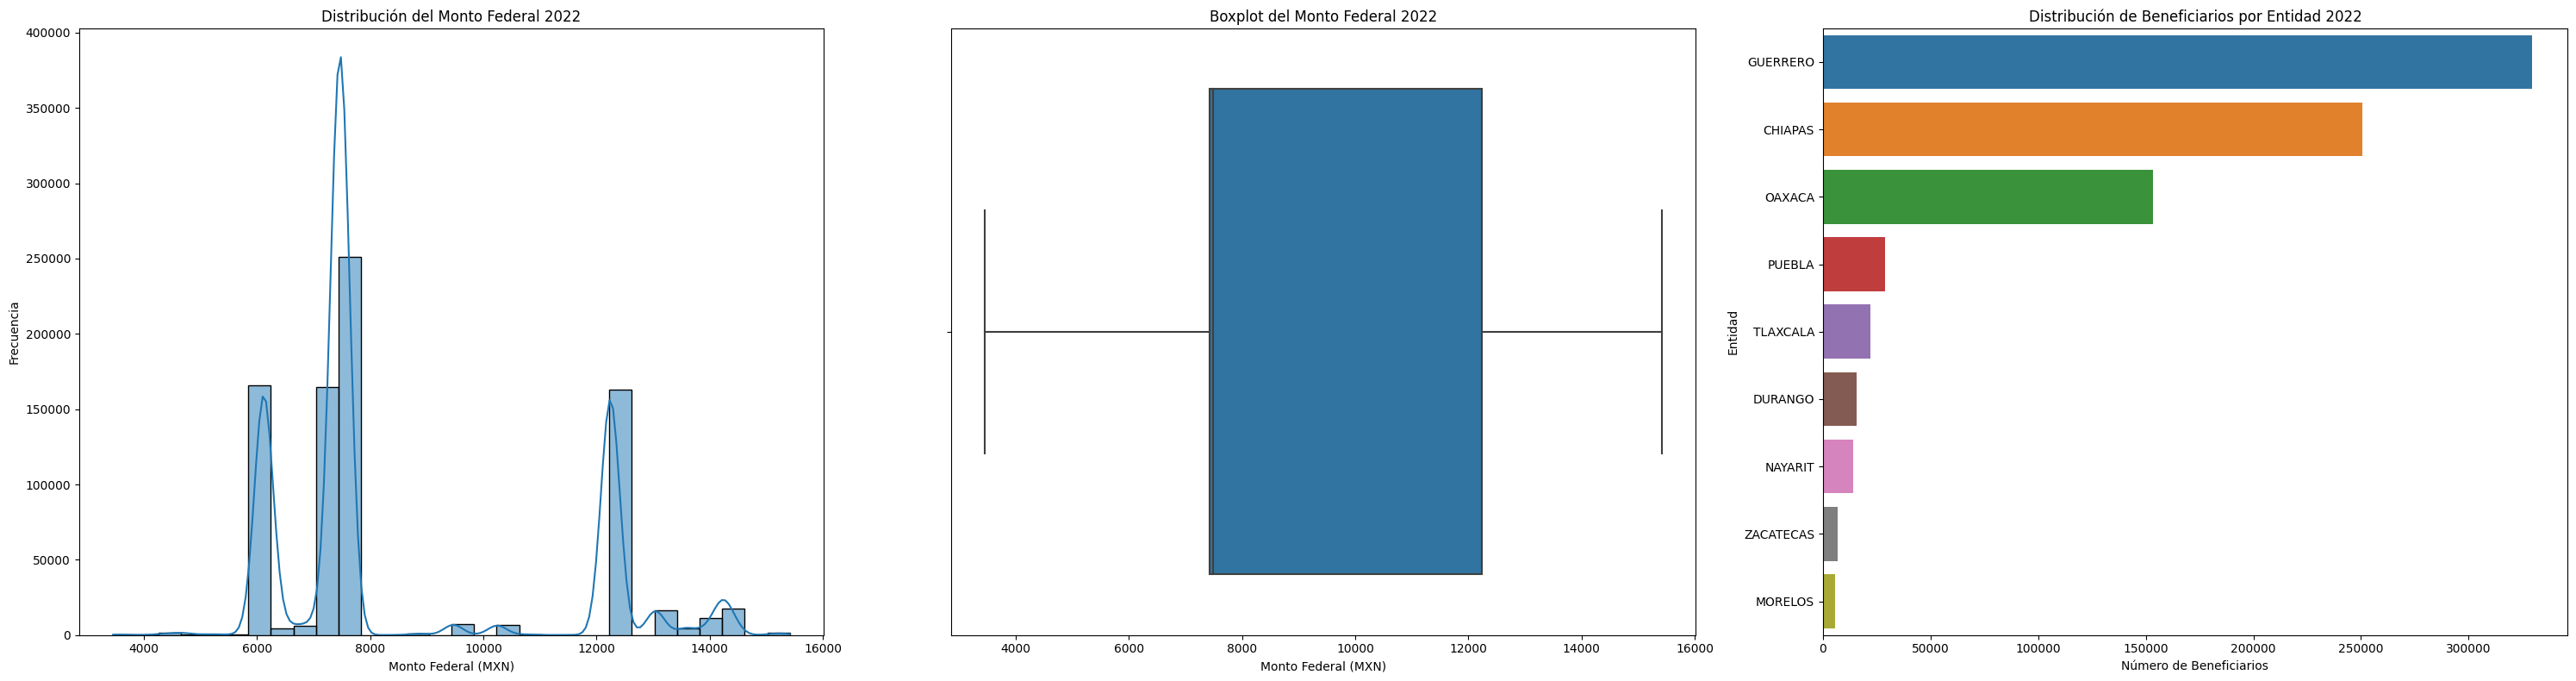

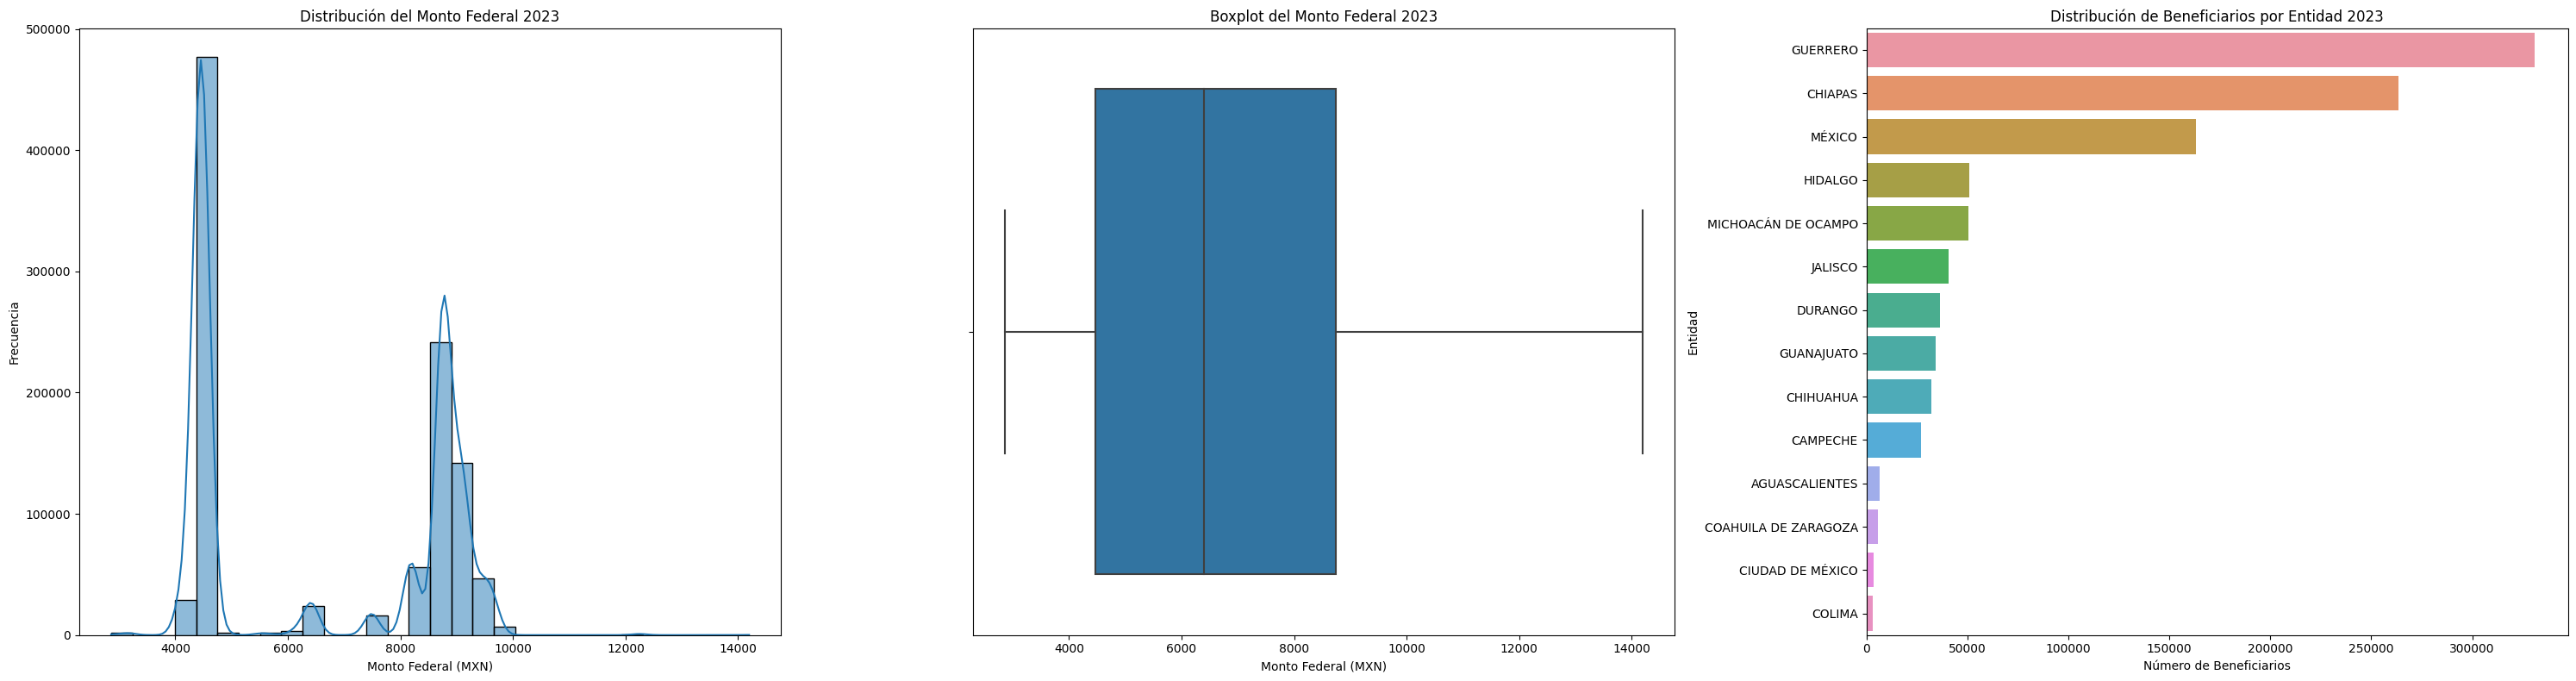

In [9]:
distribucion_plot(Beneficiarios_2020,year=2020)
distribucion_plot(Beneficiarios_2021,year=2021)
distribucion_plot(Beneficiarios_2022,year=2022)
distribucion_plot(Beneficiarios_2023,year=2023)

#### Análisis bivariado

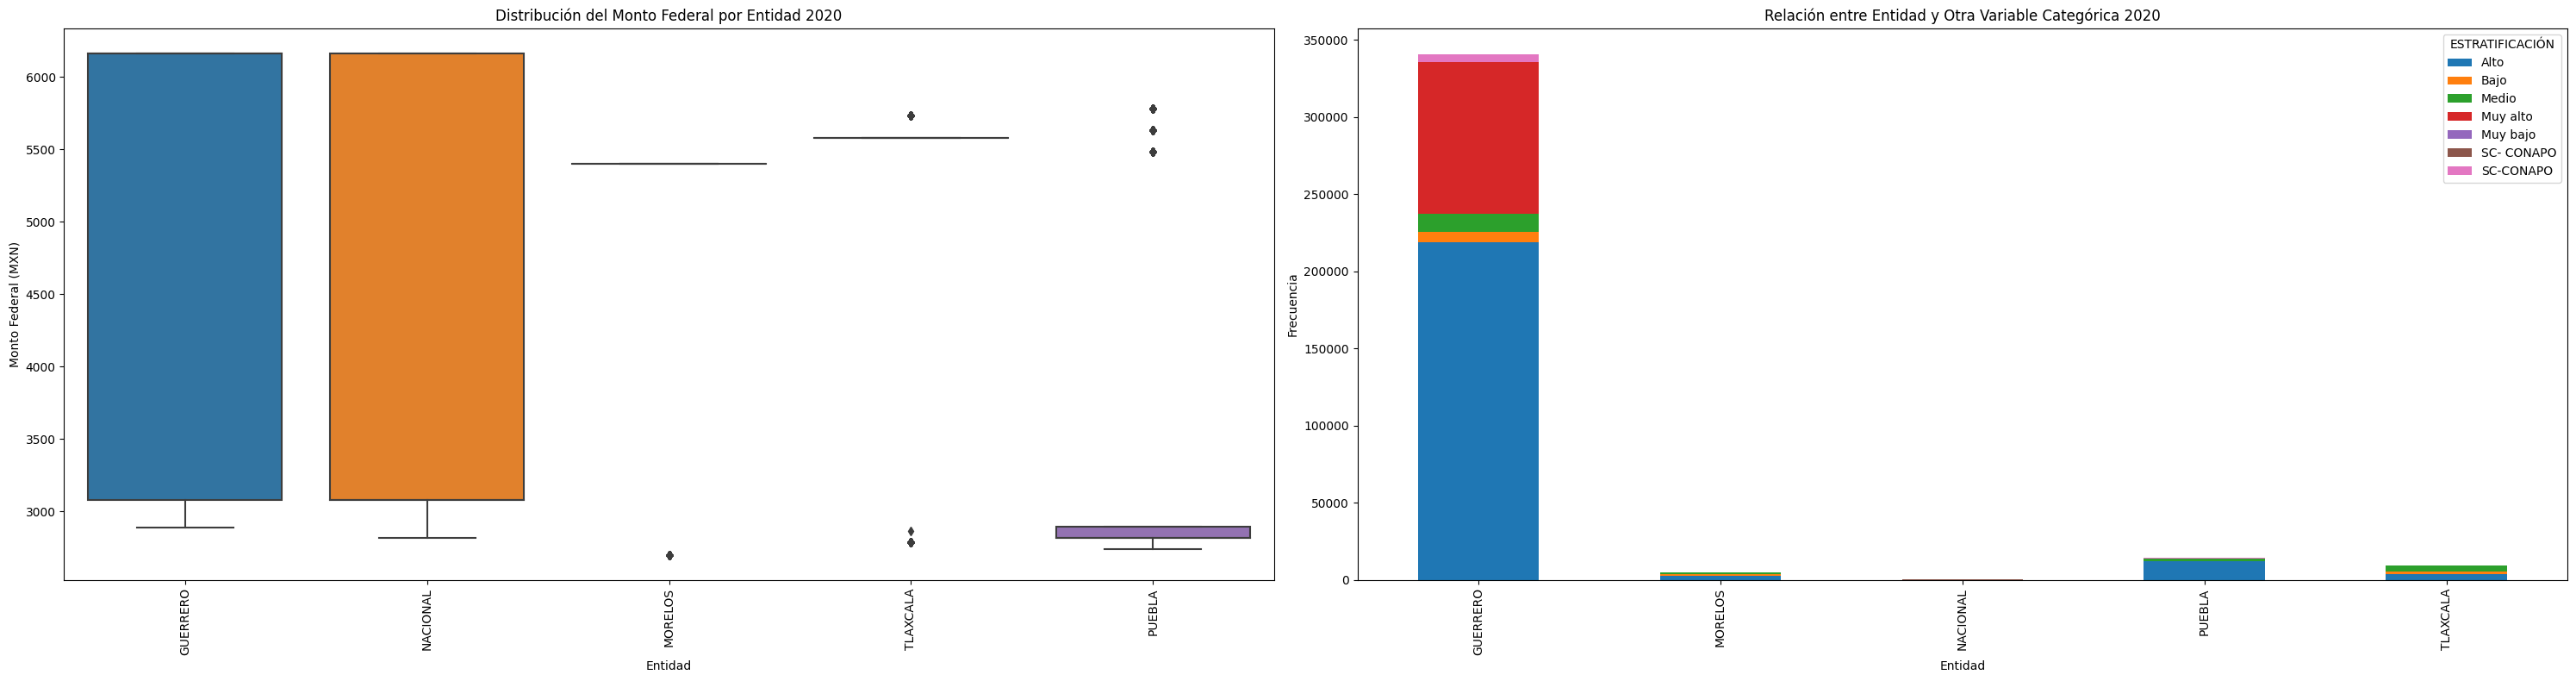

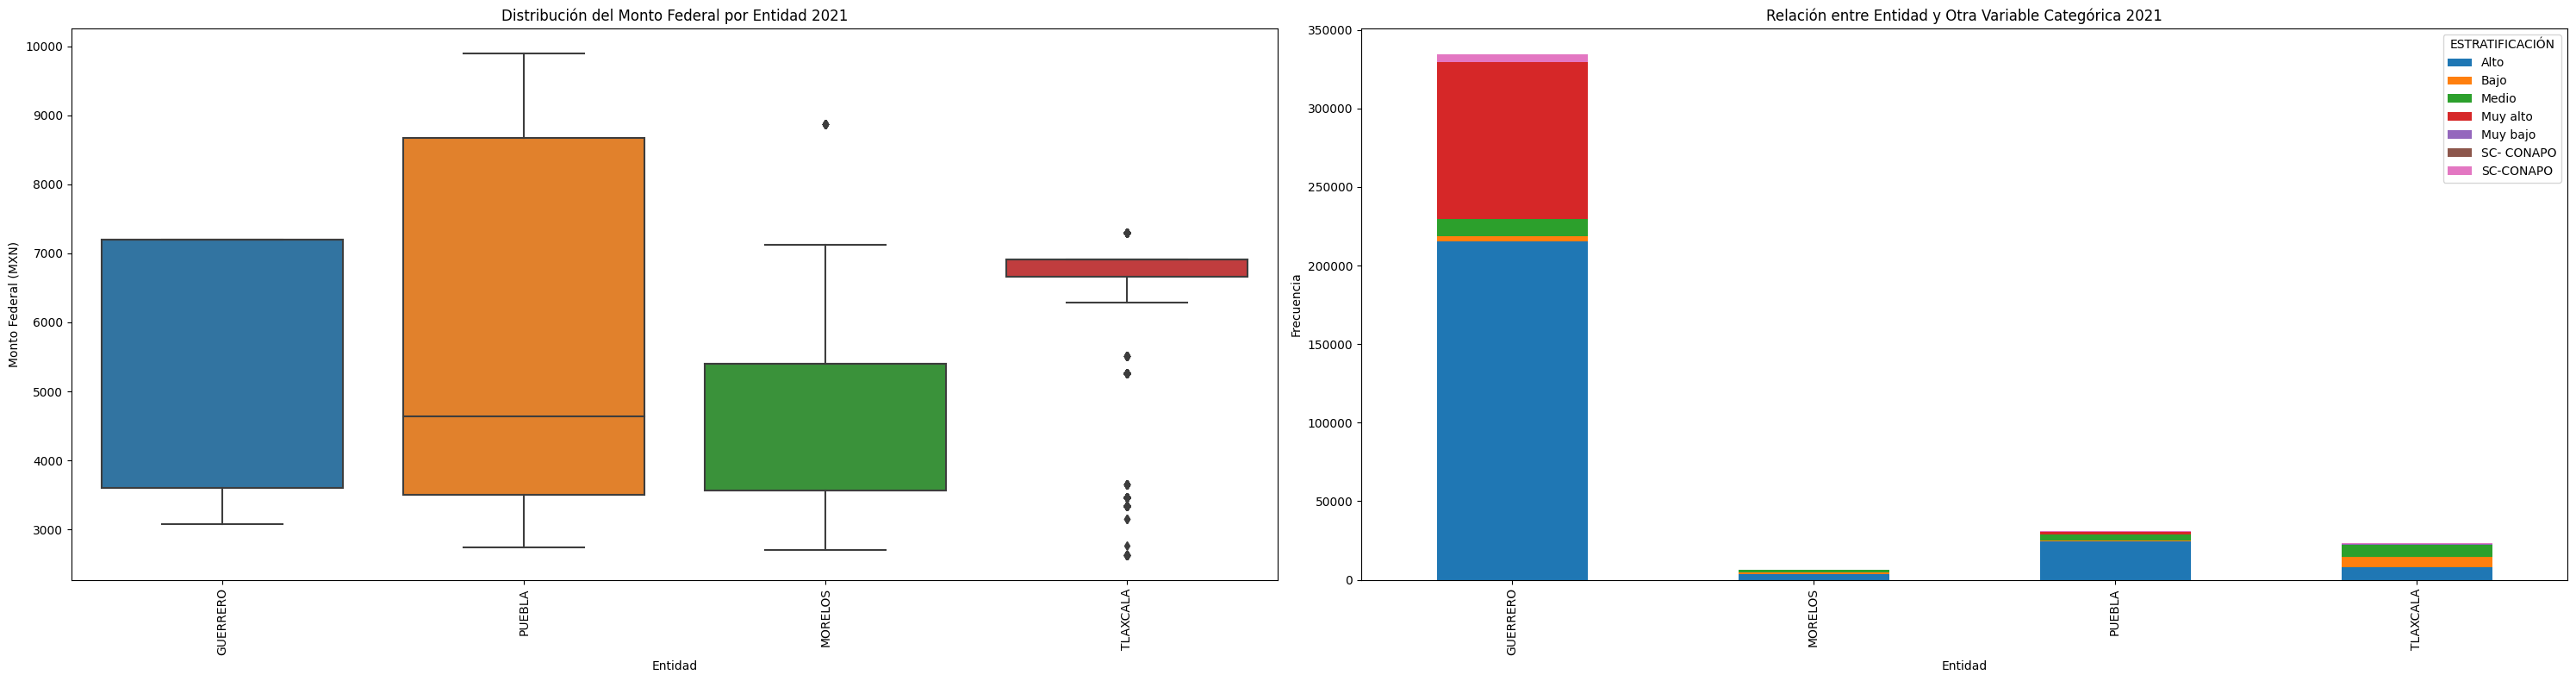

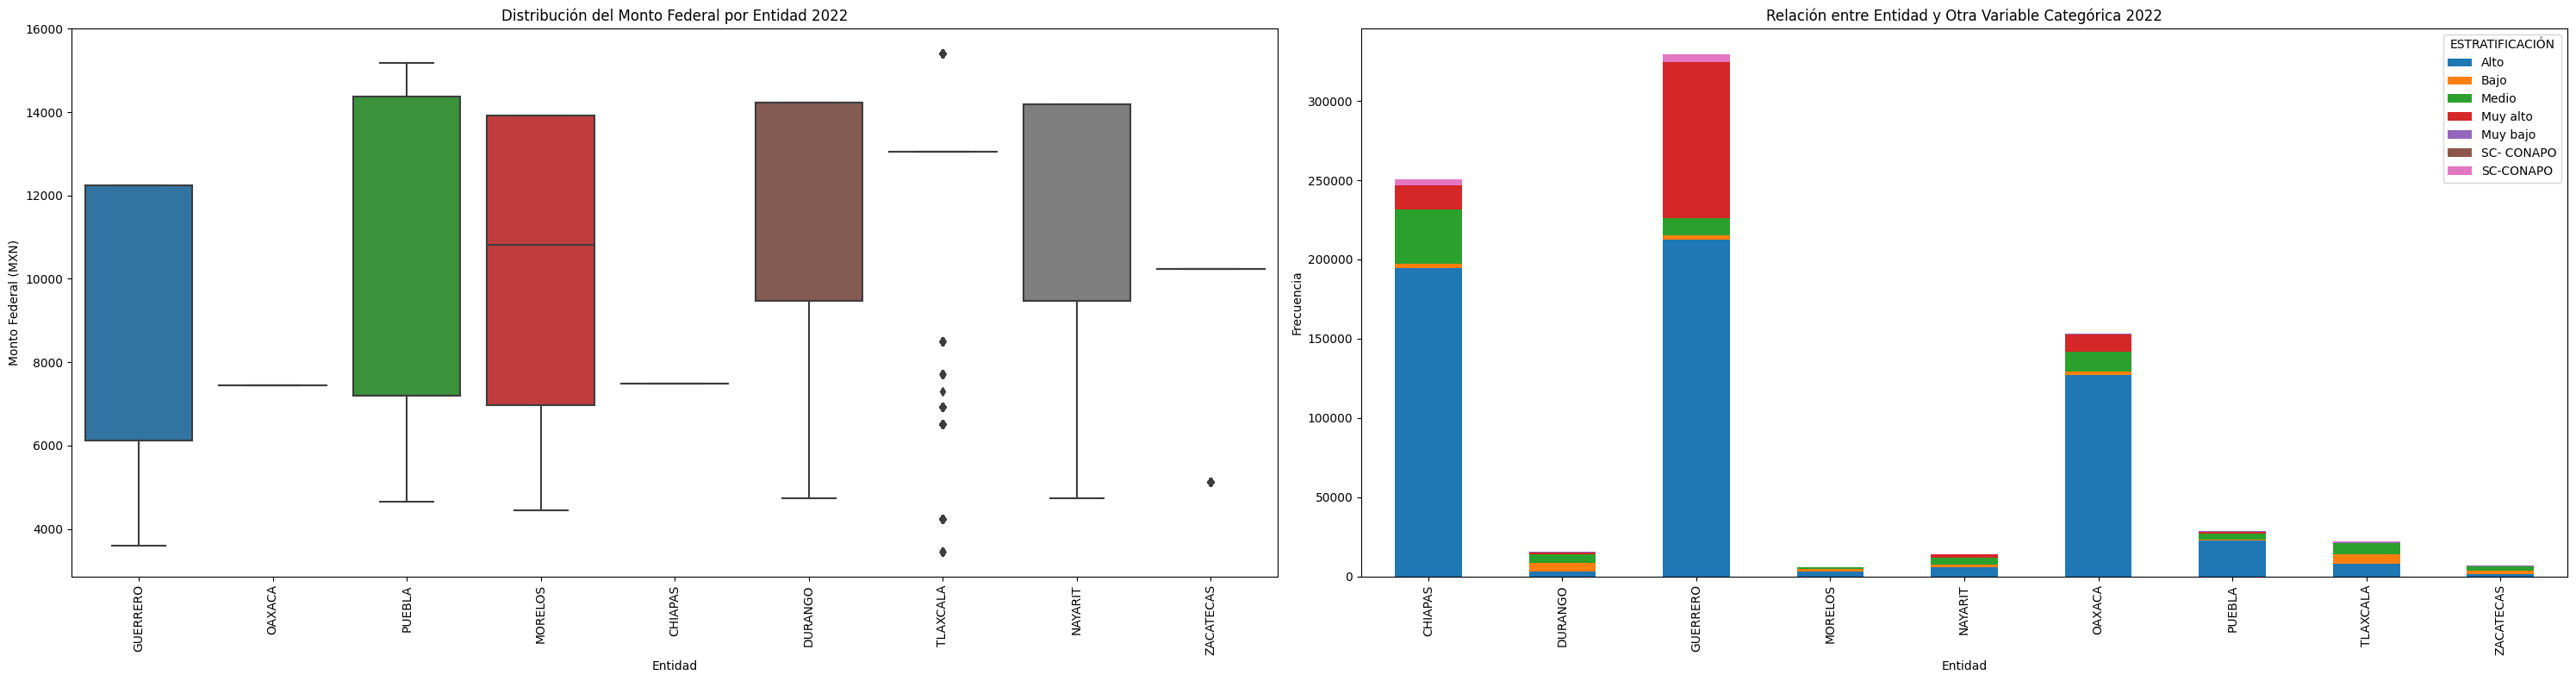

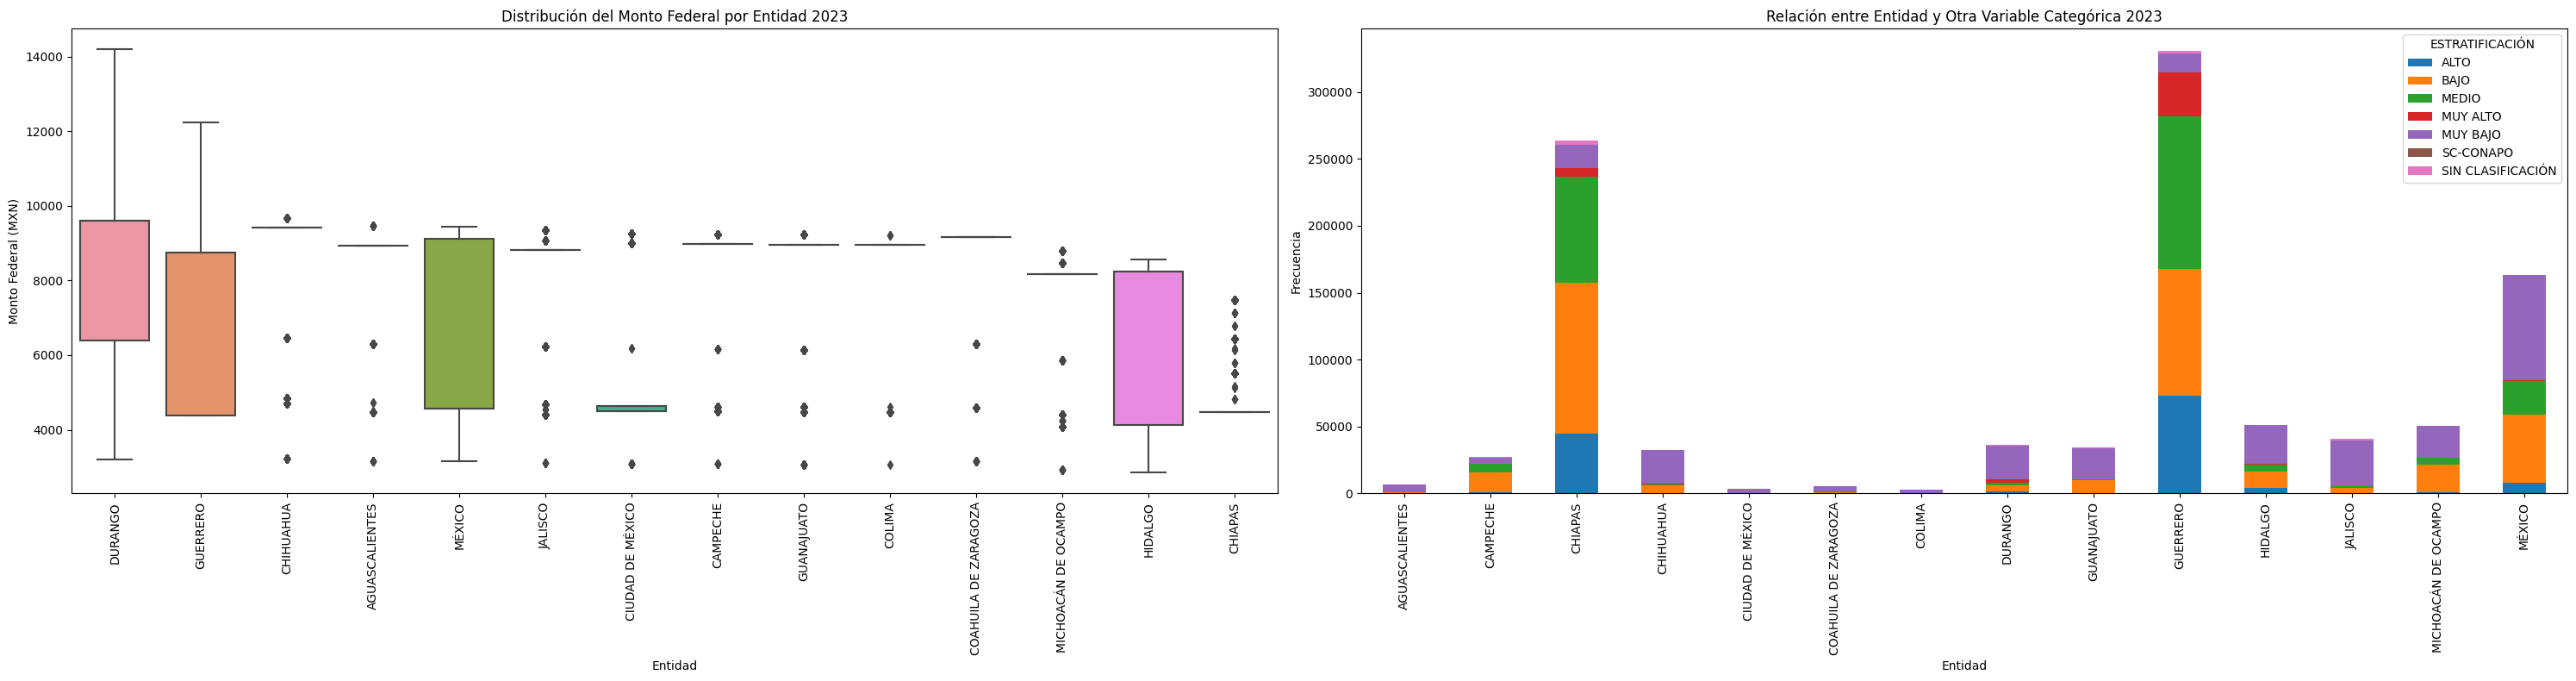

In [10]:
bivariado(Beneficiarios_2020, 2020)
bivariado(Beneficiarios_2021, 2021)
bivariado(Beneficiarios_2022, 2022)
bivariado(Beneficiarios_2023, 2023)

#### Análisis de Correlación

El análisis de correlación se realizó para identificar la relación entre las variables numéricas en el dataset del Programa de Fertilizantes. Dado que el dataset principalmente contiene datos categóricos, vamos a realizar una transformacion de los datos

In [11]:
data_2020_encode = label_encode(Beneficiarios_2020)
data_2021_encode = label_encode(Beneficiarios_2021)
data_2022_encode = label_encode(Beneficiarios_2022)
data_2023_encode = label_encode(Beneficiarios_2023)



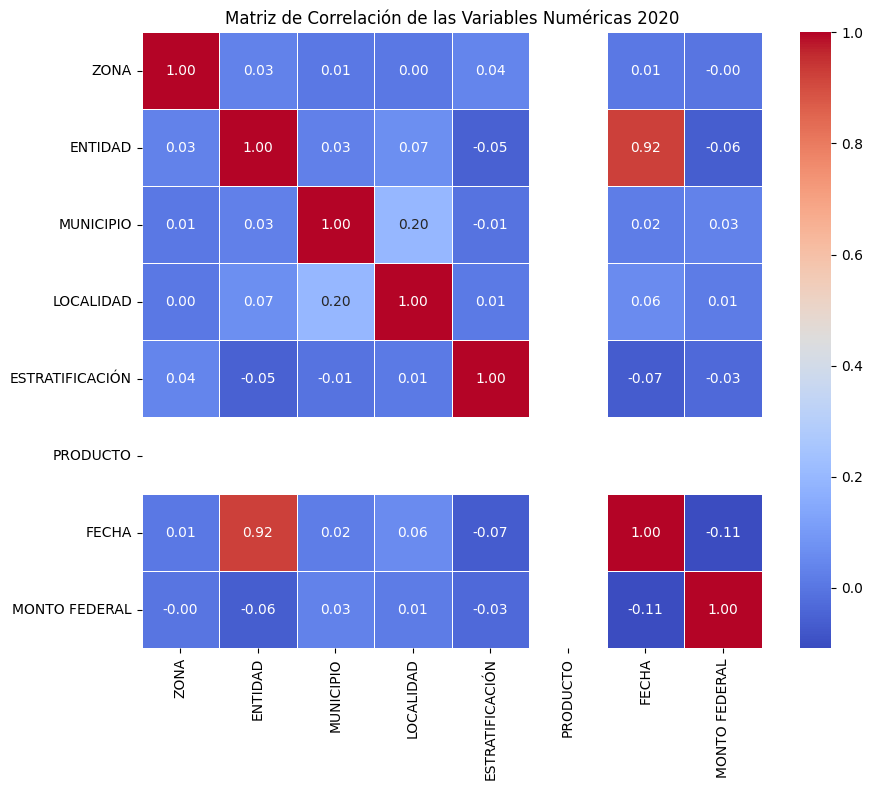

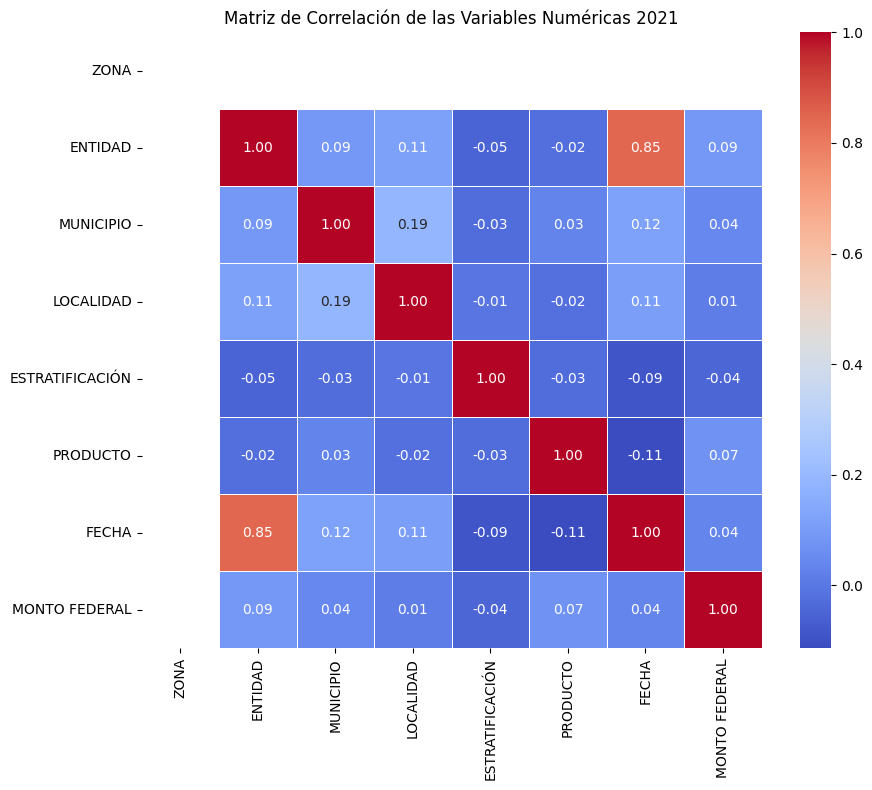

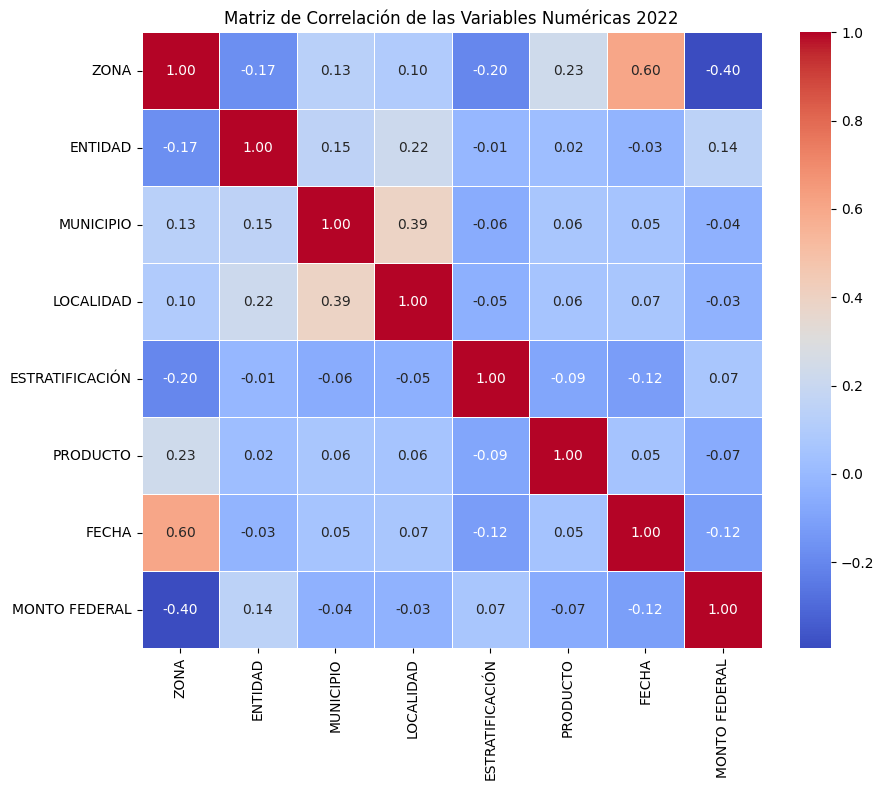

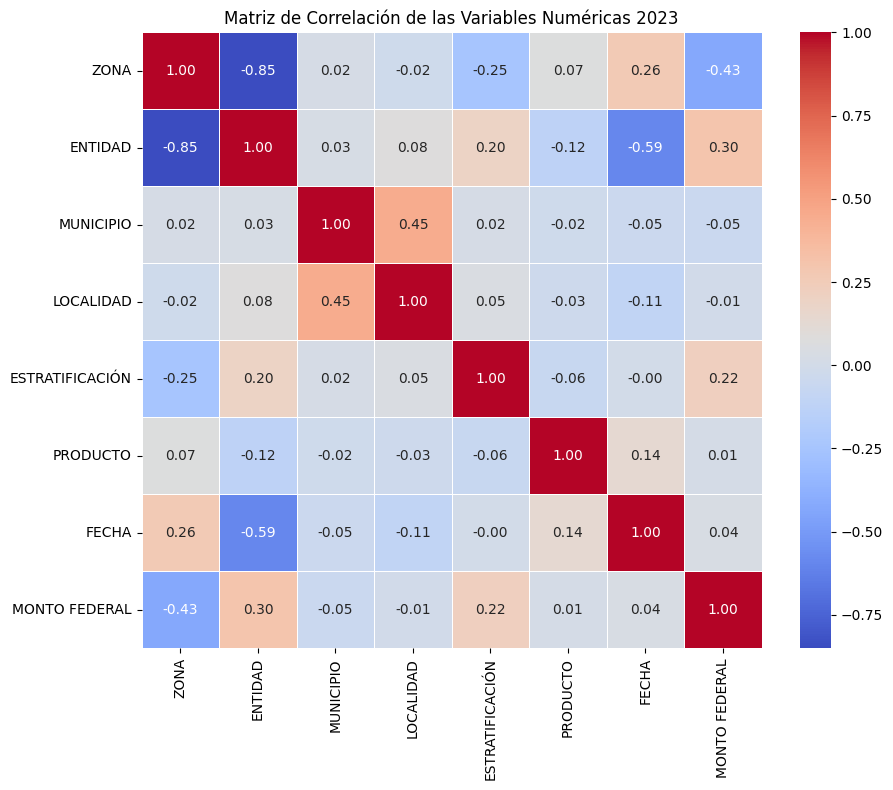

In [12]:
correlacion(data_2020_encode,2020)
correlacion(data_2021_encode,2021)
correlacion(data_2022_encode,2022)
correlacion(data_2023_encode,2023)

#### Resumen y concluciones del EDA